# MLG / Introduction to jupyter notebooks

In this laboratory you are going to learn how to perform interactive computing using **jupyter**. The **jupyter** project, born out of the IPython Project in 2014, evolved to support interactive data science and scientific computing across all programming languages. It was initially an interactive shell for python that has more functionnalities than the basic one, now it allows you to interact with your scripts using a what they called **notebooks**. The notebook extends the console-based approach to interactive computing in a qualitatively new direction, providing a web-based application suitable for capturing the whole computation process: developing, documenting, and executing code, as well as communicating the results.

This guide does not start from the basics of the general purpose language **python**. If you do not know this language, it is recommended to follow a **python** tutorial in order to learn the basic concepts and commands. You can have a look at the [official python tutorial](https://docs.python.org/2/tutorial/) or [Google's python tutorial](https://developers.google.com/edu/python/) for example.

Note that for this course, we will use the Python 3.X series.

You will use a browser-based notebook to interactively explore a dataset by:
- Reading raw data from ascii files
- Reading typed data (data frames) from ascii files
- Selecting specific columns and/or rows from a dataset
- Filtering datasets
- Plotting the information in the dataset (e.g., scatter-plot, boxplot, histogram)

## 1. Using the notebooks

You are in an jupyter notebook right now. A jupyter notebook is a web interface to a python interpreter.

A notebook is made of cells. Each cell has a type which defines what happens when it is run. 

- Markdown cells allow you to write [Markdown](http://daringfireball.net/projects/markdown/) text in them. They are just displayed as HTML when run.
- Code cells contain python code. When the cell is run, the code is sent to the python interpreter, executed and you get the result in the cell output.
- Various header cells that allow you to structure your document.

You can change the type of a cell using the drop-down menu in the toolbar.

You can click (for Code cells) or double-click (for headers and markdown cells) on cells to edit their content. You can then use keyboard shortcuts to run them :

- Ctrl + Enter : run in place
- Shift + Enter : run and move to next cell
- Alt + Enter : run and insert new cell after

In [1]:
# This is a code cell containing python code !
print( 2 + 2 )

4


The python interpreter that executes the code you write in the notebook is called a *Kernel*. You can restart the kernel (the interpreter) using the *Kernel* menu. This is useful if you want to delete all your variables.

Jupyter has also "magic" functions that start with % . They allow you to do a lot of useful things with your ipython environment :

http://nbviewer.ipython.org/github/ipython/ipython/blob/1.x/examples/notebooks/Cell%20Magics.ipynb

The %who magic gives you a list of the defined python variables. object? can be used to get documentation about an object :

In [2]:
a = 2
%who

a	 


## 2. Scientific computing with Python

In [3]:
def my_documented_function(a):
    '''
    This is a revolutionary function that returns a + 1
    '''
    return a + 1

print(my_documented_function(2))
print('This is the traditional python help() function :\n')
help(my_documented_function)

# We can access the same info with just ? (note that you have to run this cell to view the effect)
my_documented_function?

3
This is the traditional python help() function :

Help on function my_documented_function in module __main__:

my_documented_function(a)
    This is a revolutionary function that returns a + 1



Python has a number of packages (libraries) dedicated to scientific programming :

The foundation is [numpy](http://www.numpy.org/) which provides a N-dimensional array implementation with a nice indexing syntax (similar to MATLAB).

Then comes [scipy](http://www.scipy.org/) which contains a number of algorithms (signal processing, distance computation, etc...) built on top of numpy.

[matplotlib](http://matplotlib.org/) is a library to create 2D plots.

[pandas](http://pandas.pydata.org/) provides a DataFrame implementation, which is a layer on top of numpy arrays that makes some things (handling missing values, date indexing) easier. Heavily inspired by the [R](http://www.r-project.org/) statistical computing language.

[scikit-learn](http://scikit-learn.org/stable/) is a machine learning library that contains implementations of many of the most popular machine learning algorithms.

[theano](http://deeplearning.net/software/theano/) and [tensorflow](http://www.tensorflow.org) allows you to write programs that are compiled and run on a GPU.

Finally, this is not a python package, but [stack overflow](http://stackoverflow.com/) is a really good question and answers where you can probably find answers to the most common problems you'll have :-)

If you want to install a scientific python environment on your machines, we strongly suggest to use [anaconda](https://store.continuum.io/cshop/anaconda/). It is a "python distribution" that comes with a package manager (conda) and all of the scientific packages listed above (and many others) pre-installed. There is also [miniconda] which install only the basic packages and the package manager (conda) while consuming less space in your machine.

## 3. Quick numpy introduction

Numpy allows you to define [multidimensionnal arrays](http://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html) (recommended reading).

In [4]:
# Makes the numpy function available as np.<funcname> (np is a convention)
import numpy as np

array1 = np.array([
    [1, 2, 3],
    [4, 5, 6]]
)

print(array1.shape)

# The last line of a python cell is evaluated and used as the output for the cell
array1

(2, 3)


array([[1, 2, 3],
       [4, 5, 6]])

The array elements can be accessed using the [indexing syntax](http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#arrays-indexing) (recommended reading). Numpy (and python) uses 0-based indexing.

In [5]:
print("element (2,3) : ", array1[1,2])
print("first row     : ", array1[0,:])
print("second column : ", array1[:,1])
print("second and third element of the second row : ", array1[1, 1:])

element (2,3) :  6
first row     :  [1 2 3]
second column :  [2 5]
second and third element of the second row :  [5 6]


You can do a [lot of things](http://docs.scipy.org/doc/numpy/reference/) with numpy arrays. For example, we can compute the mean of each column :

In [6]:
array1.mean(axis=1)

array([2., 5.])

We can also sort an array :

In [7]:
array2 = np.array([5, 8, 2, 9, 4, 3])
print("original      : ", array2)


print("using argsort : ", array2[np.argsort(array2)]) # the fancy indexing version

array2.sort() # note that this does in-place sorting, so it *modifies* array2
print("after sort()  : ", array2)


original      :  [5 8 2 9 4 3]
using argsort :  [2 3 4 5 8 9]
after sort()  :  [2 3 4 5 8 9]


And we can randomly shuffle an array:

In [8]:
np.random.shuffle(array2)

print(array2)

print("the max value is at position:", np.argmax(array2))

[2 4 8 3 5 9]
the max value is at position: 5


We can also use comparison operators on arrays, giving us a boolean mask. And then use the mask to index the array :

In [9]:
mask = (array1 > 2) & (array1 < 5)
print(array1)
print(mask)
print(array1[mask])

[[1 2 3]
 [4 5 6]]
[[False False  True]
 [ True False False]]
[3 4]


<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Exercises</p>

As exercises, do the following :

- Compute the max of each row of array1. Compute the max of each column.
- Print the elements of array1 that are less than 4 (without a for loop)
- Convert the values of array2 to the range [0,1]

In [10]:
# Compute the max of each row of array1.
print(array1.max(axis=1))
# Compute the max of each column of array1.
print(array1.max(axis=0))
# Print the elements of array1 that are less than 4.
print(array1[np.where(array1 < 4)])
# Convert the values of array2 to the range [0,1].
print(array2 / array2.max())

[3 6]
[4 5 6]
[1 2 3]
[0.22222222 0.44444444 0.88888889 0.33333333 0.55555556 1.        ]


## 4. Loading a dataset with numpy 

### The Wine dataset

We will use the wine dataset from the UCI repository :
https://archive.ics.uci.edu/ml/datasets/Wine

The wine.data file is a simple CSV file, which we can easily load as a numpy array with np.genfromtxt.

In [11]:
# Some nicer printing defaults for numpy arrays
np.set_printoptions(precision=5, suppress=True)

# Be careful to place the database in the right directory or adapt the path
data = np.genfromtxt('data/wine/wine.data', delimiter=',')
print(data.shape)
print(data)

(178, 14)
[[   1.     14.23    1.71 ...    1.04    3.92 1065.  ]
 [   1.     13.2     1.78 ...    1.05    3.4  1050.  ]
 [   1.     13.16    2.36 ...    1.03    3.17 1185.  ]
 ...
 [   3.     13.27    4.28 ...    0.59    1.56  835.  ]
 [   3.     13.17    2.59 ...    0.6     1.62  840.  ]
 [   3.     14.13    4.1  ...    0.61    1.6   560.  ]]


So this is a dataset with 178 samples and 14 dimensions for each sample. Let's have a look at the dataset description file (cat is a nice jupyter command that prints the content of a text file, like the unix cat)

In [12]:
cat 'data/wine/wine.names'

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

In [13]:
colnames = np.array([
    'class', 'alcohol', 'malic acid', 'ash', 'alcalinity of ash', 'magnesium', 'total phenols', 
    'flavanoids', 'nonflavanoid phenols', 'proanthocyanins', 'color intensity', 'hue',
    'OD280/OD315 of diluted wines', 'proline'
])
colnames.shape

(14,)

## 5. Quick introduction to Pandas

Ok, so now we have two numpy arrays. *data* contains our data and *colnames* the name of our columns. We would like to deal with only one data structure that can store both the data and the columns names. That's what pandas' DataFrame are for ! (or, but a bit less elegant, [numpy structured arrays](http://docs.scipy.org/doc/numpy/user/basics.rec.html)).

Note that we could also directly load our CSV using pandas.read_csv)

In [14]:
import pandas as pd # pd is a convention too

df = pd.DataFrame(data=data[:,1:], columns=colnames[1:])
# Ensure the class column is an int
df['class'] = data[:,0].astype(np.int)

# Pandas dataframes have a nice pretty-printing for ipython notebooks
df

,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD280/OD315 of diluted wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0,1
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0,1
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0,1
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0,1
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0,1
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0,1


DataFrames have a nice <b>describe()</b> function that print some per-column statistics

In [15]:
print(df.describe())

          alcohol  malic acid         ash  alcalinity of ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total phenols  flavanoids  nonflavanoid phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Exercise</p>

Describe in statistical terms the alcohol variable for each class of wine. E.g., use the describe() function of dataframes for each class of wine.

In [16]:
print(df.groupby(['class'])['alcohol'].describe())

       count       mean       std    min     25%     50%     75%    max
class                                                                  
1       59.0  13.744746  0.462125  12.85  13.400  13.750  14.100  14.83
2       71.0  12.278732  0.537964  11.03  11.915  12.290  12.515  13.86
3       48.0  13.153750  0.530241  12.20  12.805  13.165  13.505  14.34


## 6. Visual exploratory analysis of data 

In statistics, exploratory data analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often with visual methods.

For example, box and whisker plots use a graphical box: the bottom and top of the box are always the first (Q1) and third (Q3) quartiles, and the band inside the box is always the second quartile (the median). The whiskers are placed at Q1 - 1.5 IQR and Q3 + 1.5 IQR, where IQR means Inter-quartile range.
See [Boxplot definition at Wikipedia](https://en.wikipedia.org/wiki/Box_plot)

### Boxplots with matplotlib

In [17]:
import pylab as pl # pylab is matplotlib
# The line below enables matplotlib-jupyter integration and allows plots to be displayed inline in the
# notebook. The --no-import-all is to avoid polluting our namespace with an import *
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


We want to see what the distribution of each feature is for each class. We'll use the [boxplot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot) function of pylab/pyplot.

classes :  [1 2 3]


/Users/faku99/opt/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


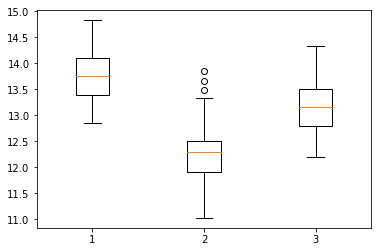

In [18]:
classes = np.unique(df['class'])
print('classes : ', classes)

#alcohol_by_class = [df['alcohol'][df['class'] == c] for c in classes]
alcohol_by_class = []
for c in classes:
    class_mask = df['class'] == c
    alcohol_by_class.append(df['alcohol'][class_mask])
_ = pl.boxplot(alcohol_by_class)

dataframes have a [boxplot](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.boxplot.html) function that does per-class plotting with the *by* parameter :

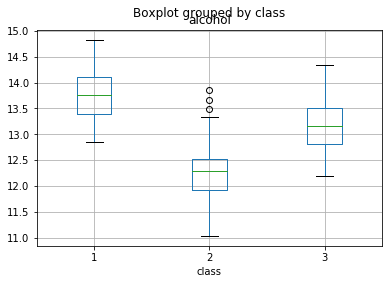

In [19]:
_ = df.boxplot(by="class", column='alcohol')

We can do that for each column

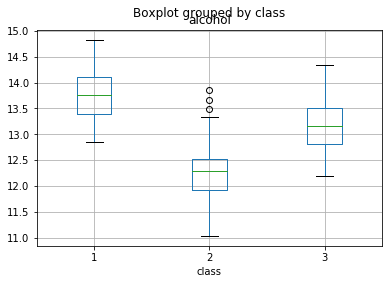

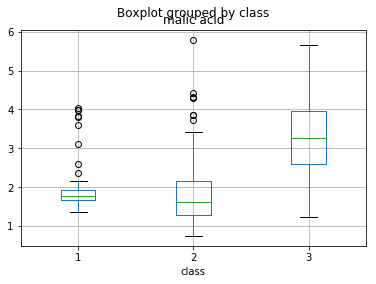

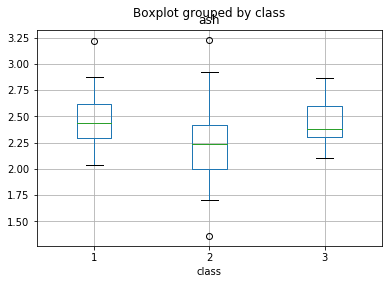

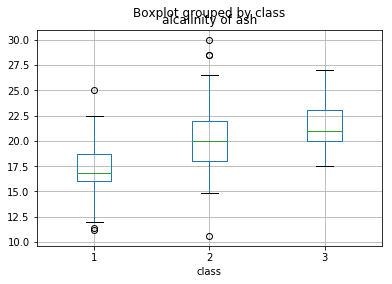

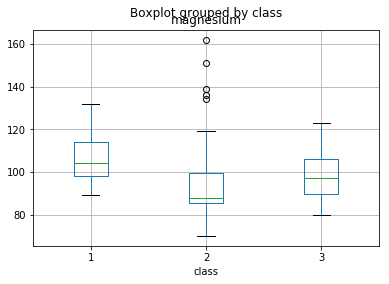

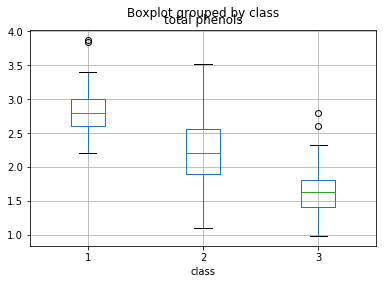

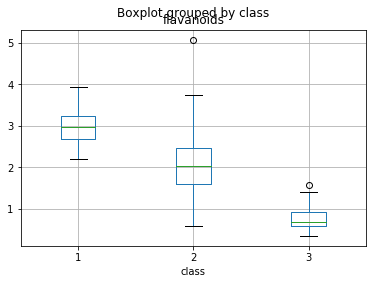

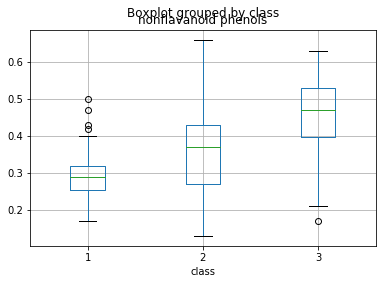

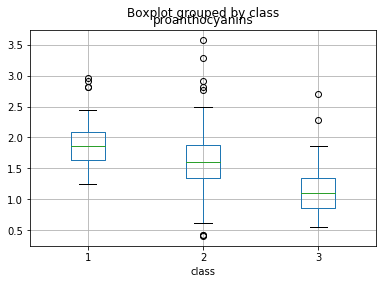

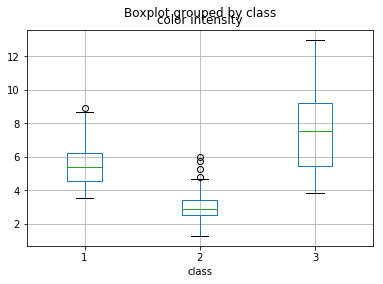

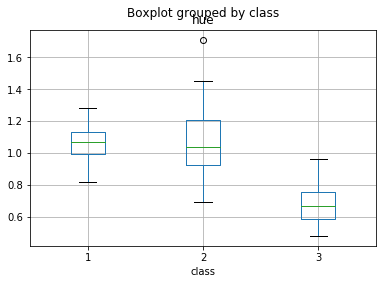

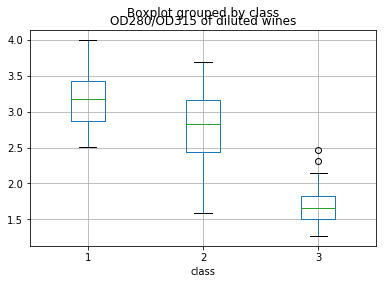

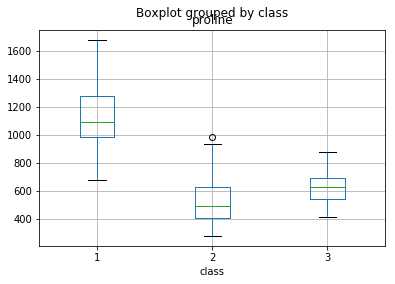

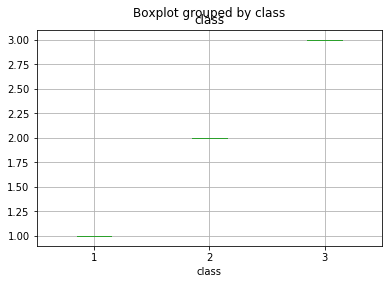

In [20]:
for c in df.columns:
    _ = df.boxplot(by='class', column=c)

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: By looking at the boxplot, which feature seems the most discriminative ?</p>

> Flavanoids seem to be the most discriminative feature.

## 7. Classifying the wine data

Let's first try a rule-based approach to classify the wine data.

Suppose that the <b>alcohol</b> variable allows for a good classification and by observing the corresponding boxplot, let's define the rules that associate a class to alcohol range values.

In [21]:
pred = []

for row in df['alcohol']:
    if row > 13.5:
        pred.append(1);
    elif row > 12.75 and row < 13.5 :
        pred.append(2);    
    else:
        pred.append(3)

# A new column is added to the dataframe
df['prediction'] = pred

In [22]:
df

,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD280/OD315 of diluted wines,proline,class,prediction
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0,1,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0,1,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0,1,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0,1,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0,1,2
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0,1,1
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0,1,1
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0,1,1
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0,1,1
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0,1,1


<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Can you estimate the performance of such a classification method ?</p>

The performance is 0.34 which is not fabulous.

In [23]:
print(np.count_nonzero(np.where(df['class'] == df['prediction'], 1, 0)) / len(df))

0.33707865168539325


<b>Hint:</b> Divide the number of times the prediction value corresponds to the real one (e.g., how many times, class == prediction ?), by the total number of observations.  

## 8. Performance evaluation

#### Confusion matrix, precision, recall and F-score

A <b>confusion matrix</b> is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. In the confusion matrix all correct guesses are located in the diagonal of the table, so it's easy to visually inspect the table for errors, as they will be represented by values outside the diagonal.

For an example, please see the Wikipedia page: https://en.wikipedia.org/wiki/Confusion_matrix

Behind the confusion matrix, there are the following concepts:

<b>true positives (TP)</b>: These are cases in which we predicted yes (they have the disease), and they do have the disease.

<b>true negatives (TN):</b> We predicted no, and they don't have the disease.

<b>false positives (FP):</b> We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")

<b>false negatives (FN):</b> We predicted no, but they actually do have the disease. (Also known as a "Type II error.")

<b>precision</b>: When we predict yes, how often are we correct?<p>

<font color="red">precision = tp/(tp + fp)</font>

Sensitivity and specificity are statistical measures of the performance of a binary classification test, also known in statistics as classification function:

<b>Recall or sensitivity</b> (also called the true positive rate or probability of detection in some fields) measures the proportion of positives that are correctly identified as such (e.g., the percentage of sick people who are correctly identified as having the condition).<p>

<font color="red">recall = tp/(tp + fn)</font>

<b>Specificity</b> (also called the true negative rate) measures the proportion of negatives that are correctly identified as such (e.g., the percentage of healthy people who are correctly identified as not having the condition).

The <b>F1 score</b> can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst at 0.<p>

<font color="red">f1-score = 2 x precision x recall / ( precision + recall)</font>


In [24]:
# This function generates a colored confusion matrix.

import matplotlib.cm as cm

def plot_confusion_matrix(confmat, labels_names, ax=None):
    if ax is None:
        ax = pl.subplot(111)
    cmim = ax.matshow(confmat, interpolation='nearest', cmap=cm.jet)

    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.annotate(str(confmat[i, j]), xy=(j, i),
                        horizontalalignment='center',
                        verticalalignment='center',
                        fontsize=8)
    ax.set_xticks(np.arange(confmat.shape[0]))
    ax.set_xticklabels([labels_names[l] for l in range(confmat.shape[0])], rotation='vertical')
    ax.set_yticks(np.arange(confmat.shape[1]))
    _ = ax.set_yticklabels([labels_names[l] for l in range(confmat.shape[1])])
    ax.set_xlabel('predicted label')
    ax.xaxis.set_label_position('top')
    ax.set_ylabel('true label')
    pl.colorbar(cmim, shrink=0.7, orientation='horizontal', pad=0.01)

             precision    recall  f1-score   support

          1       0.75      0.69      0.72        59
          2       0.16      0.11      0.13        71
          3       0.15      0.23      0.18        48

avg / total       0.35      0.34      0.34       178



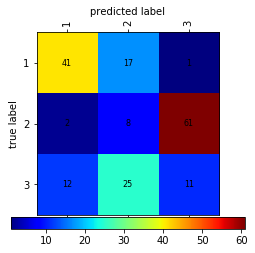

In [25]:
import sklearn.metrics as skmetrics

labels_names=['1', '2', '3']
C = skmetrics.confusion_matrix(y_true=df['class'], y_pred=df['prediction'])
plot_confusion_matrix(C, labels_names)

print(skmetrics.classification_report(y_true=df['class'], y_pred=df['prediction']))

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Define a rule that uses the most discriminative feature to classify the wine observations ?</p>

In [26]:
pred = []

for row in df['flavanoids']:
    if row >= 2.5:
        pred.append(1)
    elif row < 2.5 and row >= 1.5:
        pred.append(2)
    else:
        pred.append(3)
        
df['prediction'] = pred

df

,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD280/OD315 of diluted wines,proline,class,prediction
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0,1,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0,1,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0,1,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0,1,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0,1,1
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0,1,1
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0,1,1
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0,1,1
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0,1,1
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0,1,1


<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Compute the confusion matrix of the resulting rule-based system ?</p>

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Compute the precision, the recall and the f1-score of the system for a given class using the values of the confusion matrix ?</p>